In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random
import math

from scipy.linalg import svdvals
from sklearn.preprocessing import normalize

from minsv import *
from errorbound import *
from gencorrup import *
from gennoise import *
from qrk1 import *
from qrk2 import *
from noisyRK import *
from thm25 import *
from thm24 import *

In [2]:
#Matrix dimensions
m = 20000
n = 100

#Vary the matrix type
A_t = np.random.randn(m,n)
#A_t = np.random.uniform(size=(m,n))
#A_t = np.random.binomial(1,0.5,size=(m,n))

#Create the solution equation
A_n = normalize(A_t)
x_t = np.random.randn(n,1)
b_t = np.dot(A_n,x_t)

x_1 = np.zeros((n,1))
x_1[0] = 1

q = 0.8

e_0 = np.linalg.norm(-1*x_t)**2

In [3]:
#Corruption size + rate manipulation
beta = 0.0001
csize = 10000
num = 10000
iters = list(range(num))

#Noise parameters
mu = 0 #fixed
sig = 0.0001
mu2 = sig*math.sqrt(2/np.pi)
sig2 = sig*math.sqrt(1-2/np.pi)
noise_max = 0
sampsize = 10

In [4]:
#Compute sigma values

sigmin = minSV2(A_n,q,beta)
sigmax = np.linalg.svd(A_n,compute_uv=False).max()

In [5]:
#kacz experiment for 2.4
_,_,kacz_experiment_qrk,_,N,NBS = QuantileRK2(A_n,x_t,b_t,q,m,beta,csize,sig,num)

In [6]:
L = NBS[0]
L

array([[ 4.12181332e-05],
       [ 5.18601015e-05],
       [-1.44547895e-04],
       ...,
       [-1.18136564e-04],
       [-1.21266098e-04],
       [-1.20159535e-04]])

In [7]:
errors,phi = error_bound_thm_2_4(A_n,x_t,q,beta,N,NBS,q,num)
phi

0.00028983595191034374

In [8]:
#kacz experiment avg for 2.4

kacz_experiment_qrk_avg = [0]*num
errors24_avg = [0]*num
for i in range(sampsize):
    _,_,kacz_experiment_qrk,noise_m_i,_,_ = QuantileRK2(A_n,x_t,b_t,q,m,beta,csize,sig,num)
    errors24,_ = error_bound_thm_2_4(A_n,x_t,q,beta,N,NBS,q,num)
    kacz_experiment_qrk_avg = list(map(lambda x: x[0]+x[1], list(zip(kacz_experiment_qrk,kacz_experiment_qrk_avg))))
    errors24_avg = list(map(lambda x: x[0]+x[1], list(zip(errors24,errors24_avg))))
kacz_experiment_qrk_avg = list(map(lambda x: x/sampsize, kacz_experiment_qrk_avg))
errors24_avg = list(map(lambda x: x/sampsize, errors24_avg))

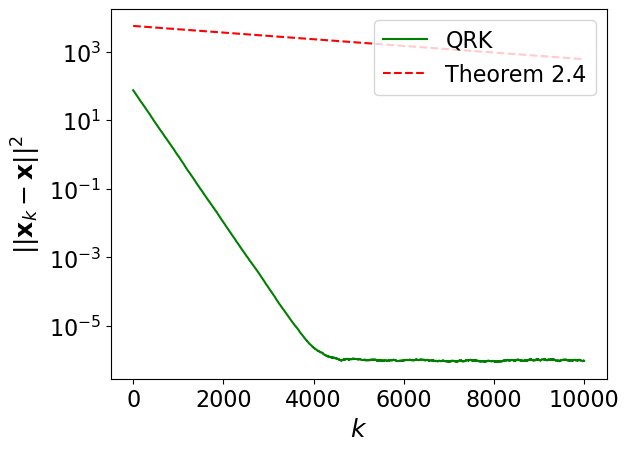

In [9]:
fig = plt.figure()

plt.semilogy(iters,kacz_experiment_qrk_avg,'g-')
plt.semilogy(iters,errors24_avg, 'r--')

#plt.title(r"$20000 \times 100$ Matrix, $\mu = $, $\sigma = $")
plt.rcParams.update({'font.size': 16})
plt.tick_params(labelsize=16)
plt.xlabel('$k$',{'size':18})
plt.ylabel('$||\mathbf{x}_k - \mathbf{x}||^2$',{'size':18})
plt.legend(['QRK','Theorem 2.4'],loc="upper right")
fig.show()

In [10]:
#kacz experiment for corollaries

kacz_experiment_qrk_avg = [0]*num
for i in range(sampsize):
    _,_,kacz_experiment_qrk,noise_m_i,_,_ = QuantileRK2(A_n,x_t,b_t,q,m,beta,csize,sig,num)
    noise_max = max(noise_max,noise_m_i)
    kacz_experiment_qrk_avg = list(map(lambda x: x[0]+x[1], list(zip(kacz_experiment_qrk,kacz_experiment_qrk_avg))))
kacz_experiment_qrk_avg = list(map(lambda x: x/sampsize, kacz_experiment_qrk_avg))

In [11]:
noise_max

0.0006156541784254174

In [12]:
#Generate errors

errors1 = error_bound_crl_1(A_n,x_t,q,beta,noise_max,q,num)

In [13]:
#errors2 = error_bound_crl_2(A_n,x_t,q,beta,mu,sig,mu2,sig2,q,num)

In [14]:
errors3 = error_bound_crl_3(A_n,x_t,q,beta,sig,q,num)

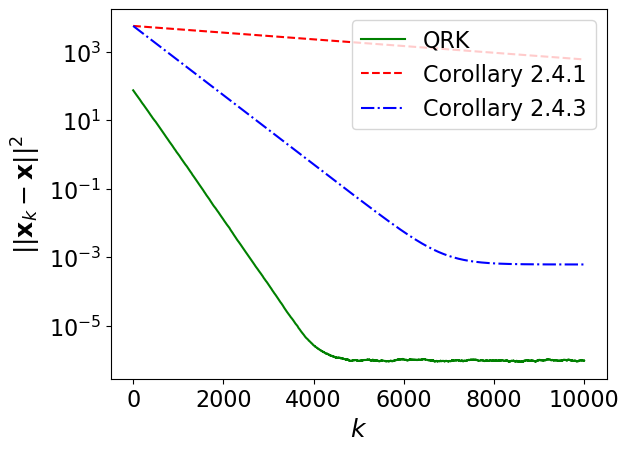

In [15]:
fig = plt.figure()

plt.semilogy(iters,kacz_experiment_qrk_avg,'g-')
plt.semilogy(iters,errors1, 'r--')
#plt.semilogy(iters,errors2, 'g--')
plt.semilogy(iters,errors3, 'b-.')

#plt.title(r"$20000 \times 100$ Matrix, $\mu = $, $\sigma = $")
plt.rcParams.update({'font.size': 16})
plt.tick_params(labelsize=16)
plt.xlabel('$k$',{'size':18})
plt.ylabel('$||\mathbf{x}_k - \mathbf{x}||^2$',{'size':18})
plt.legend(['QRK','Corollary 2.4.1', 'Corollary 2.4.3'],loc="upper right")
fig.show()